<a href="https://colab.research.google.com/github/VietHoangg03/Machine_Learning_Basic/blob/main/CheckAttendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 34.9 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
import faiss
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from tqdm import tqdm

In [6]:
!gdown 1Wj5g8ZMo1wL5vZyeR1oViTP9ZXtIGO

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Wj5g8ZMo1wL5vZyeR1oViTP9ZXtIGO

but Gdown can't. Please check connections and permissions.


In [7]:
!gdown 1WINKn7eU2RizsImBhsb-pPWisulzPK09

Downloading...
From: https://drive.google.com/uc?id=1WINKn7eU2RizsImBhsb-pPWisulzPK09
To: /content/Dataset.zip
100% 1.34M/1.34M [00:00<00:00, 135MB/s]


In [8]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/Avatar_Aaron_Eckhart.jpg  
  inflating: Dataset/Avatar_Aaron_Guiel.jpg  
  inflating: Dataset/Avatar_Amy_Pascal.jpg  
  inflating: Dataset/Avatar_Amy_Redford.jpg  
  inflating: Dataset/Avatar_Andrew_Bernard.jpg  
  inflating: Dataset/Avatar_Andrew_Cuomo.jpg  
  inflating: Dataset/Avatar_Anh_Khoi.JPG  
  inflating: Dataset/Avatar_Anil_Ramsook.jpg  
  inflating: Dataset/Avatar_Camille_Lewis.jpg  
  inflating: Dataset/Avatar_Carla_Gay_Balingit.jpg  
  inflating: Dataset/Avatar_Dang_Nha.jpg  
  inflating: Dataset/Avatar_Hoang_Nguyen.jpg  
  inflating: Dataset/Avatar_Minh_Chau.jpg  
  inflating: Dataset/Avatar_Phuc_Thinh.JPG  
  inflating: Dataset/Avatar_Quoc_Thai.JPG  
  inflating: Dataset/Avatar_Thang_Duong.jpg  
  inflating: Dataset/Avatar_Thuan_Duong.jpg  
  inflating: Dataset/Avatar_Tien_Huy.jpg  


In [9]:
dataset_path = 'Dataset'

In [10]:
os.listdir(dataset_path)

['Avatar_Amy_Redford.jpg',
 'Avatar_Hoang_Nguyen.jpg',
 'Avatar_Andrew_Bernard.jpg',
 'Avatar_Thuan_Duong.jpg',
 'Avatar_Andrew_Cuomo.jpg',
 'Avatar_Minh_Chau.jpg',
 'Avatar_Camille_Lewis.jpg',
 'Avatar_Aaron_Eckhart.jpg',
 'Avatar_Anil_Ramsook.jpg',
 'Avatar_Dang_Nha.jpg',
 'Avatar_Tien_Huy.jpg',
 'Avatar_Carla_Gay_Balingit.jpg',
 'Avatar_Quoc_Thai.JPG',
 'Avatar_Phuc_Thinh.JPG',
 'Avatar_Aaron_Guiel.jpg',
 'Avatar_Anh_Khoi.JPG',
 'Avatar_Thang_Duong.jpg',
 'Avatar_Amy_Pascal.jpg']

In [12]:
image_paths = []
labels = []

In [13]:
for filename in os.listdir(dataset_path):
    if filename.endswith(('.jpg', '.JPG', '.png', '.jpeg')):
        image_paths.append(os.path.join(dataset_path, filename))
        file_name = filename.split('.')[0]
        label = file_name[7:]
        labels.append(label)

In [14]:
image_paths

['Dataset/Avatar_Amy_Redford.jpg',
 'Dataset/Avatar_Hoang_Nguyen.jpg',
 'Dataset/Avatar_Andrew_Bernard.jpg',
 'Dataset/Avatar_Thuan_Duong.jpg',
 'Dataset/Avatar_Andrew_Cuomo.jpg',
 'Dataset/Avatar_Minh_Chau.jpg',
 'Dataset/Avatar_Camille_Lewis.jpg',
 'Dataset/Avatar_Aaron_Eckhart.jpg',
 'Dataset/Avatar_Anil_Ramsook.jpg',
 'Dataset/Avatar_Dang_Nha.jpg',
 'Dataset/Avatar_Tien_Huy.jpg',
 'Dataset/Avatar_Carla_Gay_Balingit.jpg',
 'Dataset/Avatar_Quoc_Thai.JPG',
 'Dataset/Avatar_Phuc_Thinh.JPG',
 'Dataset/Avatar_Aaron_Guiel.jpg',
 'Dataset/Avatar_Anh_Khoi.JPG',
 'Dataset/Avatar_Thang_Duong.jpg',
 'Dataset/Avatar_Amy_Pascal.jpg']

In [15]:
labels

['Amy_Redford',
 'Hoang_Nguyen',
 'Andrew_Bernard',
 'Thuan_Duong',
 'Andrew_Cuomo',
 'Minh_Chau',
 'Camille_Lewis',
 'Aaron_Eckhart',
 'Anil_Ramsook',
 'Dang_Nha',
 'Tien_Huy',
 'Carla_Gay_Balingit',
 'Quoc_Thai',
 'Phuc_Thinh',
 'Aaron_Guiel',
 'Anh_Khoi',
 'Thang_Duong',
 'Amy_Pascal']

In [16]:
df = pd.DataFrame({'image_path': image_paths, 'label': labels})
df

,image_path,label
0,Dataset/Avatar_Amy_Redford.jpg,Amy_Redford
1,Dataset/Avatar_Hoang_Nguyen.jpg,Hoang_Nguyen
2,Dataset/Avatar_Andrew_Bernard.jpg,Andrew_Bernard
3,Dataset/Avatar_Thuan_Duong.jpg,Thuan_Duong
4,Dataset/Avatar_Andrew_Cuomo.jpg,Andrew_Cuomo
5,Dataset/Avatar_Minh_Chau.jpg,Minh_Chau
6,Dataset/Avatar_Camille_Lewis.jpg,Camille_Lewis
7,Dataset/Avatar_Aaron_Eckhart.jpg,Aaron_Eckhart
8,Dataset/Avatar_Anil_Ramsook.jpg,Anil_Ramsook
9,Dataset/Avatar_Dang_Nha.jpg,Dang_Nha


# Store Image like vector

Vectorize Image

In [17]:
IMAGE_SIZE = 300
VECTOR_DIM = 300 * 300 * 3  # For RGB images (300x300x3)

In [18]:
index = faiss.IndexFlatL2(VECTOR_DIM)
label_map = []

In [19]:
def image_to_vector(image_path):
    """Convert image to normalized vector"""
    img = Image.open(image_path).resize((IMAGE_SIZE, IMAGE_SIZE))
    img_array = np.array(img)

    # Handle grayscale images (convert to RGB)
    if len(img_array.shape) == 2:
        img_array = np.stack((img_array,)*3, axis=-1)

    # Normalize pixel values to [0, 1]
    vector = img_array.astype('float32') / 255.0
    return vector.flatten()

In [20]:
for idx, row in df.iterrows():
    image_path = row['image_path']
    label = row['label']

    try:
        vector = image_to_vector(image_path)
        # Add to Faiss index
        index.add(np.array([vector]))
        label_map.append(label)
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

In [21]:
# Save the index and label map for later use
faiss.write_index(index, "employee_images.index")
np.save("label_map.npy", np.array(label_map))

## Search

In [22]:
def search_similar_images(query_image_path, k=5):
    """Search for similar employee images"""
    # Load index and labels
    index = faiss.read_index("employee_images.index")
    label_map = np.load("label_map.npy")

    # Convert query image to vector
    query_vector = image_to_vector(query_image_path)

    # Search in Faiss
    distances, indices = index.search(np.array([query_vector]), k)

    # Get results
    results = []
    for i in range(len(indices[0])):
        employee_name = label_map[indices[0][i]]
        distance = distances[0][i]
        results.append((employee_name, distance))

    return results

In [23]:
def display_query_and_top_matches(query_image_path):
    query_img = Image.open(query_image_path)
    query_img = query_img.resize((300, 300))

    plt.figure(figsize=(5, 5))
    plt.imshow(query_img)
    plt.title("Query Image")
    plt.axis('off')
    plt.show()

    matches = search_similar_images(query_image_path)

    """Display the top 5 matching employee images with distances"""
    # Get the image paths for the results
    top_matches = []
    for name, distance in matches:
        # Find the image path for this employee in df
        img_path = df[df['label'] == name]['image_path'].values[0]
        top_matches.append((name, distance, img_path))
    top_matches

    # Create plot
    plt.figure(figsize=(15, 5))
    for i, (name, distance, img_path) in enumerate(top_matches):
        img = Image.open(img_path)
        img = img.resize((300, 300))

        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(f"{name}\nDist: {distance:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [24]:
# Test Image
query_image_path1 = "/content/Dataset/Avatar_Thuan_Duong.jpg"

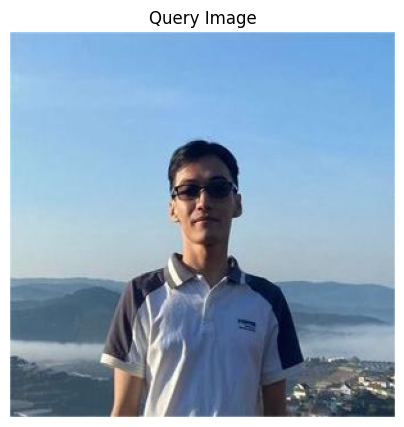

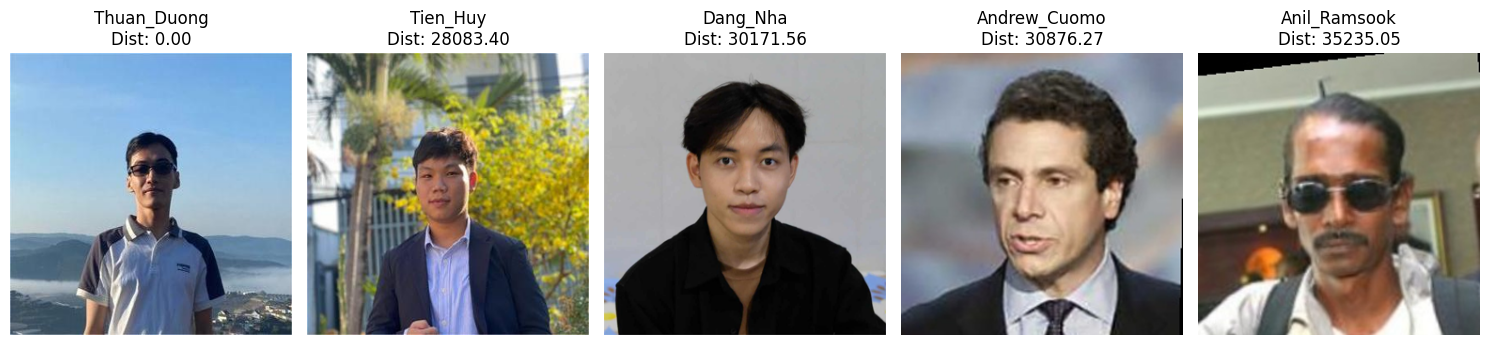

In [25]:
display_query_and_top_matches(query_image_path1)

In [33]:
# Stored Image
query_image_path2 = "/content/Dataset/Avatar_Hoang_Nguyen.jpg"

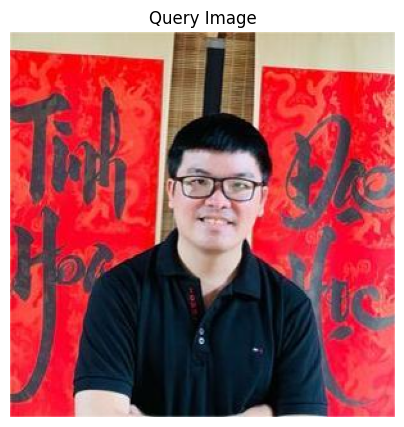

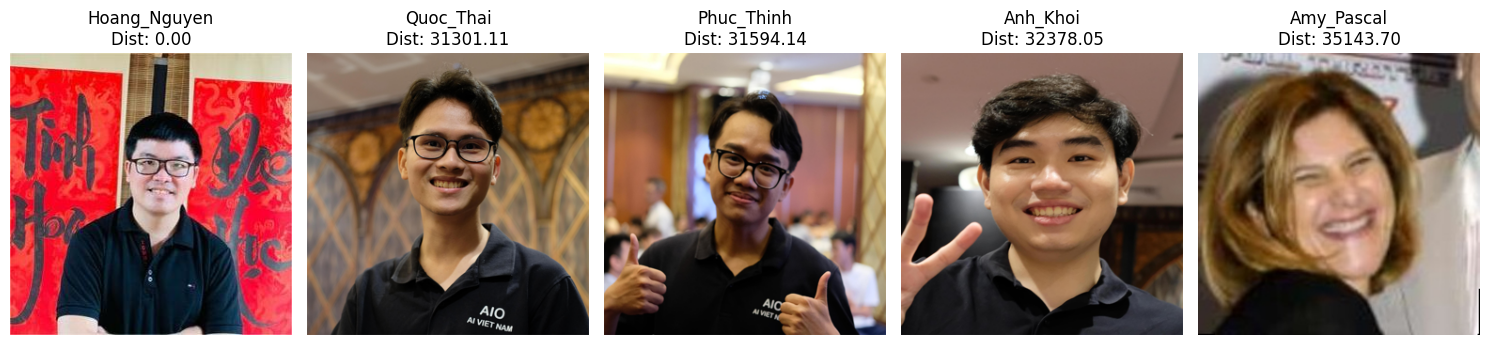

In [34]:
display_query_and_top_matches(query_image_path2)

In [35]:
# Initialize ResNet50 model for feature extraction
model = models.resnet50(pretrained=True)
# Remove the last classification layer
model = torch.nn.Sequential(*(list(model.children())[:-1]))
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 34.9MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [36]:
!pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 610.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.

In [37]:
# Install Pretrained model (for face recognition task)

from facenet_pytorch import InceptionResnetV1
face_recognition_model = InceptionResnetV1(pretrained='vggface2').eval()

OpenCV bindings requires "numpy" package.
Install it via command:
    pip install numpy


  0%|          | 0.00/107M [00:00<?, ?B/s]

In [38]:
transform = transforms.Compose([
    transforms.Resize((300, 300)), # Resize to the model's input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # Normalize
])

In [39]:
def extract_feature(image_path, model):
    """Extract features from an image using a given model."""
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)
    with torch.no_grad():
        features = model(img_tensor)
    return features.squeeze().numpy()

In [40]:
VECTOR_DIM = 512
index = faiss.IndexFlatIP(VECTOR_DIM)
label_map = []

In [41]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    features = extract_feature(row['image_path'], face_recognition_model)
    index.add(np.array([features]))
    label_map.append(row['label'])

100%|██████████| 18/18 [00:07<00:00,  2.50it/s]


In [ ]:
# Save index and labels
faiss.write_index(index, "facenet_features.index")
np.save("facenet_label_map.npy", np.array(label_map))

In [42]:
def image_to_feature(image_path, model):
    """Convert image to face embedding using a pre-trained model"""
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0) # Add batch dimension
    # Get the embedding
    with torch.no_grad(): # Disable gradient calculation
        embedding = model(img_tensor)

    # Return the embedding as a numpy array
    return embedding.squeeze().numpy()

In [43]:
def search_similar_images(query_image_path, k=5):
    """Search for similar employee images using VGG16 features"""
    # Load index and labels
    index = faiss.read_index("facenet_features.index")
    label_map = np.load("facenet_label_map.npy")

    # Convert query image to vector
    query_vector = image_to_feature(query_image_path, face_recognition_model)

    # Search in Faiss
    similarities, indices = index.search(np.array([query_vector]), k)

    # Get results
    results = []
    for i in range(len(indices[0])):
        employee_name = label_map[indices[0][i]]
        similarity = similarities[0][i]
        results.append((employee_name, similarity))

    return results

In [4]:
def display_query_and_top_matches(query_image_path):
    # Display query image
    query_img = Image.open(query_image_path)
    query_img = query_img.resize((300, 300))
    plt.figure(figsize=(5, 5))
    plt.imshow(query_img)
    plt.title("Query Image")
    plt.axis('off')
    plt.show()

    # Get matches
    matches = search_similar_images(query_image_path)

    # Display top matches
    plt.figure(figsize=(15, 5))
    for i, (name, similarity) in enumerate(matches):
        # Find the image path for this employee
        img_path = df[df['label'] == name]['image_path'].values[0]
        img = Image.open(img_path)
        img = img.resize((300, 300))

        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(f"{name}\nSimilarity: {similarity:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [7]:
# Test Image
query_image_path1 = "/content/Dataset/Avatar_Thuan_Duong.jpg"

In [5]:
display_query_and_top_matches(query_image_path1)

NameError: name 'Image' is not defined

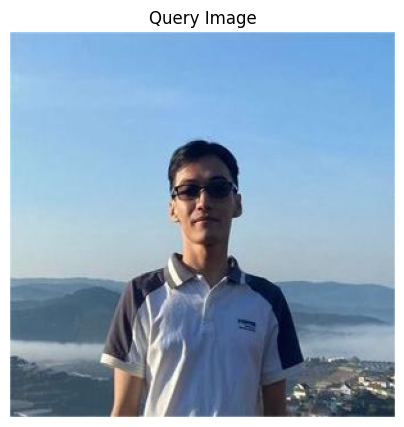

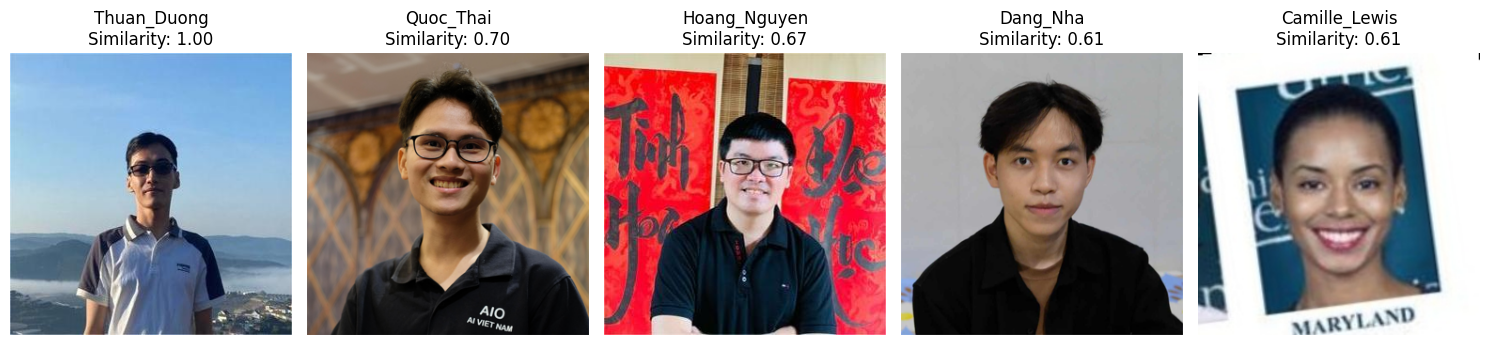

In [ ]:
display_query_and_top_matches(query_image_path1)